<a href="https://colab.research.google.com/github/ValensioLeonard/BCG_Insidesherpa_Virtual_Internship-DataScience-/blob/main/Machine_Learning/Dental_Health_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dental Health Classifier, Bangkit Final Capstone**

<img src=https://raw.githubusercontent.com/ValensioLeonard/Bangkit_Final_Capstone_Vivere/main/Machine_Learning/image_resource/bangkit%20background.png class="center">

In this notebook, a model is developed to classify whether a teeth is considered healthy or unhealthy. The teeth is considered unhealthy if the teeth have one or more caries. This project is part of [Bangkit 2021](https://grow.google/intl/id_id/bangkit/) Final Capstone Project and a property of team Vivere.

In [ ]:
# # Run this if tensorflow is not on version 2.4.1
# !pip install tensorflow==2.4.1

In [ ]:
import numpy as np
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tqdm import tqdm
from shutil import copyfile
import re
from shutil import move


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Ensure that the tensorflow version is 2.4.X
print(tf.__version__)

2.4.1


In [ ]:
# !pip3 freeze > requirements.txt 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Bangkit Final Project Files/'

/content/gdrive/MyDrive/Bangkit Final Project Files


## Generate Dataset Folder

This section is used for data handling, the temporary directory is used to create a copy of the original dataset to prevent data changes in the original dataset.

In [ ]:
# # Define our directories and files
# train_dir = 'Dataset/Training/'
# validation_dir = 'Dataset/Validation/'

In [ ]:
# # Use Temporary dir

# # Populate Temporary Directory
# def copy_file(source, destination):
#   list_to_copy = os.listdir(source)
#   for member in tqdm(list_to_copy):
#     source_file = os.path.join(source, member)
#     dest_file = os.path.join(destination, member)
#     copyfile(source_file, dest_file)

# copy_file(train_dir, 'Dataset/Dataset2/Training')
# copy_file(validation_dir, 'Dataset/Dataset2/Validation')

In [ ]:
# Update Training and Validation Dir

train_dir = '../Dataset2/Training'
validation_dir = '../Dataset2/Validation'

## Move file to appropriate folder

In this project, our team used image generator for automatically labelling data and for uploading it to the model. Therefore, this section is used to move the file according to the image generator path example as seen below.

<img src=https://raw.githubusercontent.com/ValensioLeonard/Bangkit_Final_Capstone_Vivere/main/Machine_Learning/image_resource/path_example.png width="800">


In [ ]:
# def move_to_class(dir):
#   files = os.listdir(dir)
#   for file in files:
#     source_file = os.path.join(dir, file)
#     try:
#       if re.findall(r'^(.+)\.[0-9]+', file)[0] == 'no':
#         dest_file = os.path.join(dir, 'Healthy' ,file)
#         move(source_file, dest_file)
#       else:
#         dest_file = os.path.join(dir, 'Caries' ,file)
#         move(source_file, dest_file)
#     except:
#       print('Skipped: ' + file)

# move_to_class(train_dir)
# move_to_class(validation_dir)

## Convert file format to PNG

Since the image used for the modelling have different formats, this section is used to convert all of the images into .png format.

In [ ]:
# from PIL import Image
# import os

# def convert_to_png(dir, verbose = False, remove_former = False):
#   for file in os.listdir(dir):
#     if file.endswith(".png") == False:
#         im = Image.open(os.path.join(dir, file))
#         name = re.findall(r'(.+)\.[\w+]+', file)[0] + '.png'        
#         rgb_im = im.convert('RGB')
#         rgb_im.save(os.path.join(dir, name))

#         if remove_former:
#           os.remove(os.path.join(dir, file))

#         if verbose:
#           print('converted ' + file + ' to ' + name)
#         continue
#     else:
#         continue

In [ ]:
# convert_to_png(os.path.join(train_dir, 'Healthy'), verbose = True, remove_former = True)
# convert_to_png(os.path.join(train_dir, 'Caries'),  remove_former = True)
# convert_to_png(os.path.join(validation_dir, 'Healthy'),  remove_former = True)
# convert_to_png(os.path.join(validation_dir, 'Caries'),  remove_former = True)

## Initiate Image Generator

In this section, we can list all of the files within classes inside the training and validation folder.

In [ ]:
train_heathy_dir = os.path.join(train_dir, 'Healthy')
train_caries_dir = os.path.join(train_dir, 'Caries')
validation_healthy_dir = os.path.join(validation_dir, 'Healthy')
validation_caries_dir = os.path.join(validation_dir, 'Caries')

train_heathy_fnames = os.listdir(train_heathy_dir)
train_caries_fnames = os.listdir(train_caries_dir)
validation_healthy_fnames = os.listdir(validation_healthy_dir)
validation_caries_fnames = os.listdir(validation_caries_dir)

print(len(train_heathy_fnames))
print(len(train_caries_fnames))
print(len(validation_healthy_fnames))
print(len(validation_caries_fnames))

56
57
24
24


The part below is an implementation of data-augmentation. This is used to help our model learn more from our limited data. For more information on data augmentation, visit: 

https://www.tensorflow.org/tutorials/images/data_augmentation

In [ ]:
# initializing ImageDataGenerator for training dataset
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255.,
                                   zoom_range = 0.2,
                    9               shear_range = 0.2,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   horizontal_flip = True)

# Validation data should be loaded as original without augmentation
test_datagen = ImageDataGenerator(rescale = 1./255.)

# Point the image generator flow from directory to training directory
# Use batch size of 10 images
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode = 'binary',
                                                    batch_size = 10,
                                                    target_size = (224, 224))     

# Point the image generator flow from directory to validation directory
# Use batch size of 10 images
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                    class_mode = 'binary',
                                                    batch_size = 10,
                                                    target_size = (224, 224))

# Expected Output:
# Found 113 images belonging to 2 classes.
# Found 48 images belonging to 2 classes.

Found 113 images belonging to 2 classes.
Found 48 images belonging to 2 classes.


## Modelling

In this project, we used transfer learning and then fine tune it using the images that we already prepared. The reason why we used transfer learning is because our data is limited in size, thus transfer learning can help the model with the lower level features of the images.

For more information, visit: https://www.tensorflow.org/tutorials/images/transfer_learning

In [1]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
feature_extractor_layer = hub.KerasLayer(
  feature_extractor_model, input_shape = (224, 224, 3), trainable=False)

In [ ]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(1, activation ='sigmoid')
])

model.summary()

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
history = model.fit_generator(train_generator,
                    validation_data = validation_generator,
                    verbose = 1,
                    epochs = 50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
12/12 [==============================] - 109s 7s/step - loss: 0.8445 - acc: 0.5667 - val_loss: 0.5031 - val_acc: 0.7708
Epoch 2/50
12/12 [==============================] - 6s 483ms/step - loss: 0.5850 - acc: 0.6538 - val_loss: 0.4260 - val_acc: 0.8125
Epoch 3/50
12/12 [==============================] - 6s 518ms/step - loss: 0.5370 - acc: 0.6716 - val_loss: 0.3777 - val_acc: 0.8542
Epoch 4/50
12/12 [==============================] - 6s 487ms/step - loss: 0.4198 - acc: 0.8186 - val_loss: 0.3557 - val_acc: 0.8750
Epoch 5/50
12/12 [==============================] - 6s 494ms/step - loss: 0.4280 - acc: 0.8494 - val_loss: 0.3256 - val_acc: 0.8542
Epoch 6/50
12/12 [==============================] - 6s 497ms/step - loss: 0.3091 - acc: 0.8519 - val_loss: 0.3063 - val_acc: 0.8750
Epoch 7/50
12/12 [==============================] - 6s 494ms/step - loss: 0.2572 - acc: 0.9256 - val_loss: 0.2860 - val_acc: 0.8750
Epoch 8/50
12/12 [==============================] - 6s 489ms/step - loss: 0.2

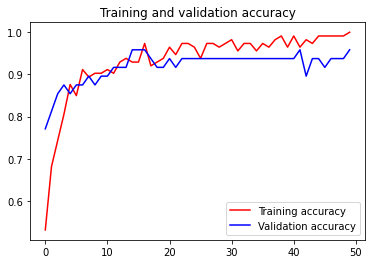

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Saving Existing Model

### Default Tensorflow Model Format

In [ ]:
!mkdir "Machine_Learning_Models"

In [ ]:
!mkdir "Machine_Learning_Models/model_leo/modelv1"

In [ ]:
# Save model to desired path

saved_model_path = "Machine_Learning_Models/model_leo/modelv1"

model.save(saved_model_path)

INFO:tensorflow:Assets written to: Machine_Learning_Models/model_leo/modelv1/assets


INFO:tensorflow:Assets written to: Machine_Learning_Models/model_leo/modelv1/assets


### Save model to H5 Format

In [ ]:
# calling model.save function
model.save("Machine_Learning_Models/model_leo/modelv1.h5")

## Load Model

In [ ]:
# For regular model.save
model = tf.keras.models.load_model("Machine_Learning_Models/model_leo/modelv1")

In [ ]:
# For h5 model format
model = tf.keras.models.load_model("Machine_Learning_Models/model_leo/modelv1.h5", custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


## Detecting Caries

In [ ]:
%cd 'GAMBAR BUAT COBA MODEL'

/content/gdrive/My Drive/Bangkit Final Project Files/GAMBAR BUAT COBA MODEL


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path= fn
  img=image.load_img(path, target_size=(224, 224)) # Read image into 224x224 size
  
  x=image.img_to_array(img)       # Convert image into array
  x=np.expand_dims(x, axis=0)     # Add batch dimension
  images = np.vstack([x]) / 255.0 # Normalize array value
  
  classes = model.predict(images)
  
  print(classes[0])
  
  if classes[0]>0.5:
    print(fn + " is healthy")
    
  else:
    print(fn + " is unhealthy")

Saving 1200px-06-10-06smile.jpg to 1200px-06-10-06smile.jpg
Saving caries.jpg to caries.jpg
Saving img09-dental-caries.jpg to img09-dental-caries.jpg
Saving item2.jpg to item2.jpg
Saving no.509.png to no.509.png
[0.617745]
1200px-06-10-06smile.jpg is healthy
[0.7452831]
caries.jpg is healthy
[0.00067759]
img09-dental-caries.jpg is unhealthy
[0.26095277]
item2.jpg is unhealthy
[0.2472175]
no.509.png is unhealthy
